In [1]:
%matplotlib inline
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("output/data.csv")

In [3]:
founded_df = data.loc[(data['Founded']!=0)]
rating_df = data.loc[(data['Rating']!=0)]
sector_df = data.loc[(data['Sector']!='0')]
size_df = data.loc[(data['Size']!= '0')]
industry_df = data.loc[(data['Industry']!='0')]
ownership_df = data.loc[(data['Type of ownership']!='0')]
competitors_df = data.loc[(data['Competitors']!='0')]
revenue_df = data.dropna()

In [4]:
engineer_df = data.loc[data['Job Title'] == 'Data Engineer']
scientist_df = data.loc[data['Job Title'] == 'Data Scientist']
analyst_df = data.loc[data['Job Title'] == 'Data Analyst']


In [5]:
data

,Job Title,Company Name,Rating,Salary Estimate Average,Salary Estimate Min,Salary Estimate Max,Location,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Competitors
0,Data Engineer,Sagence,4.5,115000.0,80000,150000.0,"New York, NY",NY,VSB (<50 Employees),2009,Company - Private,Consulting,Business Services,25000000,0,"WCI Consulting, PwC"
1,Data Engineer,Enterprise Integration,3.4,115000.0,80000,150000.0,"New York, NY",NY,SMB(51-500 Employees),1998,Company - Private,IT Services,Information Technology,50000000,0,0
2,Data Engineer,Maestro Technologies,5.0,115000.0,80000,150000.0,"New York, NY",NY,SMB(51-500 Employees),2003,Company - Private,IT Services,Information Technology,10000000,0,0
3,Data Engineer,Jane Street,4.8,115000.0,80000,150000.0,"New York, NY",NY,"Mid-Market(501-5,000 Employees)",2000,Company - Private,Investment Banking & Asset Management,Finance,0,0,0
4,Data Engineer,GNY Insurance Companies,3.7,115000.0,80000,150000.0,"New York, NY",NY,VSB (<50 Employees),1914,Company - Private,Insurance Carriers,Insurance,500000000,True,"Travelers, Chubb, Crum & Forster"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588,Data Scientist,Nationwide Children's Hospital,3.7,83500.0,55000,112000.0,"Columbus, OH",OH,"Enterprise(5,000+ Employees)",1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,2000000000,0,0
6589,Data Scientist,UCB,3.7,83500.0,55000,112000.0,"Slough, OH",OH,"Enterprise(5,000+ Employees)",0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,5000000000,0,AbbVie
6590,Data Scientist,UCB,3.7,83500.0,55000,112000.0,"Slough, OH",OH,"Enterprise(5,000+ Employees)",0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,5000000000,0,AbbVie
6591,Data Scientist,Varsity Tutors,4.2,83500.0,55000,112000.0,"Columbus, OH",OH,VSB (<50 Employees),2007,Company - Private,Internet,Information Technology,0,0,0


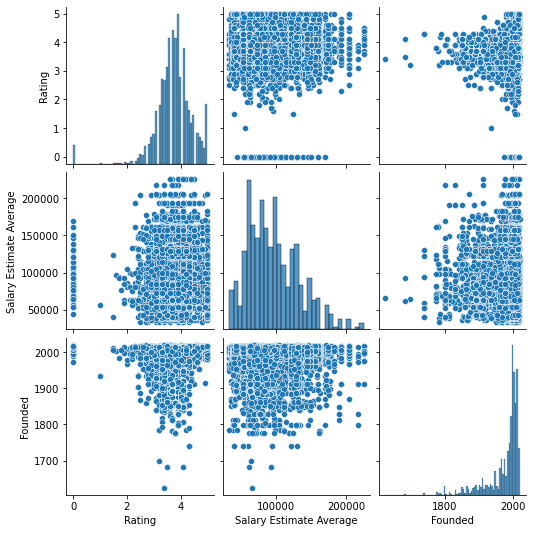

In [6]:
founded_df_copy = founded_df[[
    'Rating', 'Salary Estimate Average', 'Founded', 'State'
]]

sns.pairplot(founded_df_copy)

In [9]:
# plt.figure(figsize=(12, 10))
# sns.regplot(data['Usage/G'], data['FantasyPoints/G'])

<AxesSubplot:xlabel='Rating', ylabel='Salary Estimate Average'>

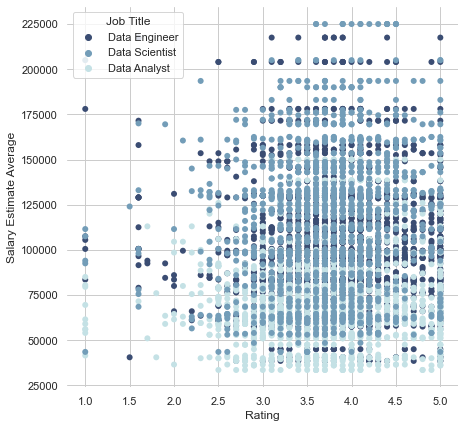

In [10]:
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(7, 7))
sns.despine(f, left=True, bottom=True)

clarity_ranking = ["Data Engineer", "Data Scientist", "Data Analyst"]
sns.scatterplot(x="Rating", y="Salary Estimate Average",
                hue="Job Title",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=rating_df, ax=ax)

C:\Users\rstro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Salary Estimate Average'>

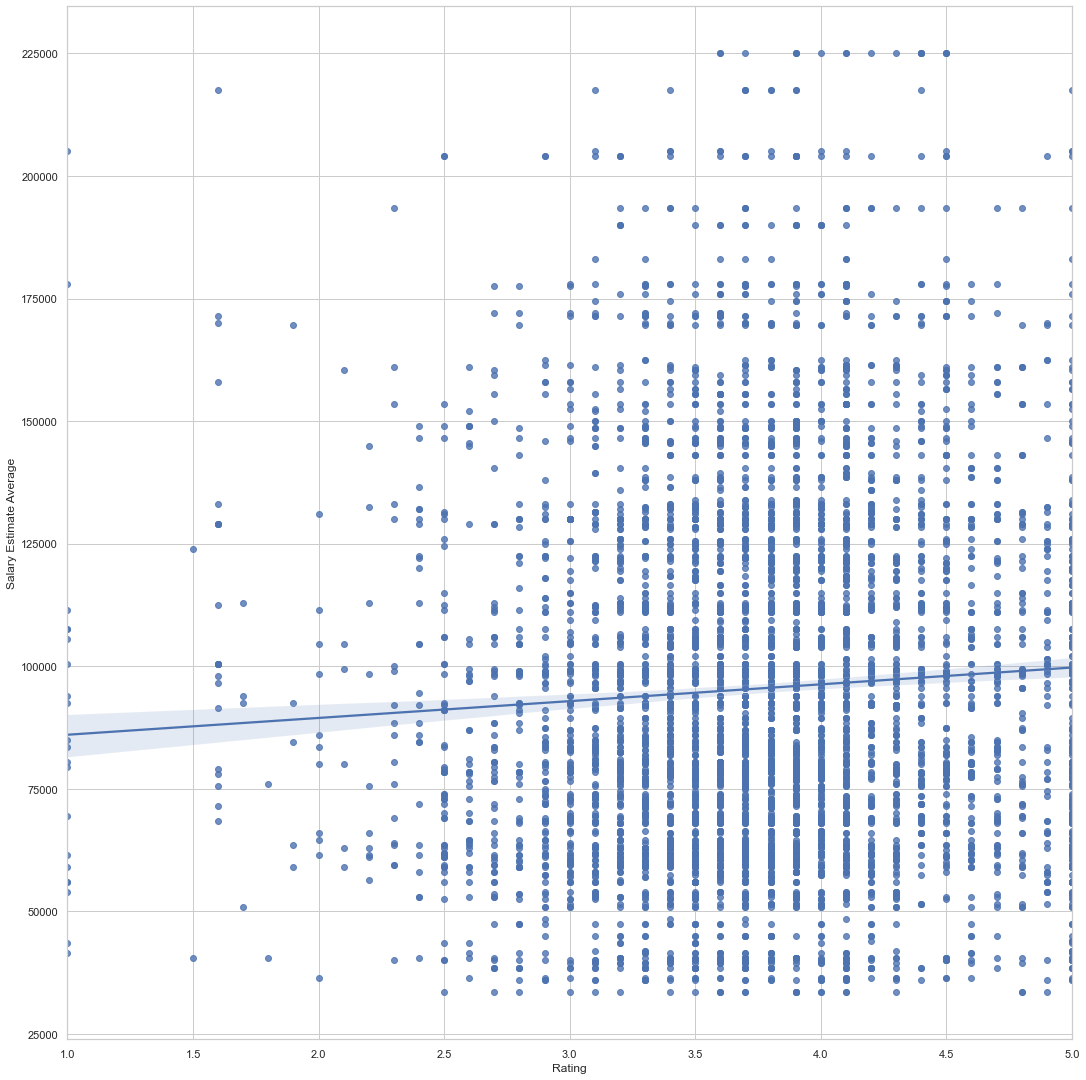

In [11]:
plt.figure(figsize=(18, 19))
sns.regplot(rating_df['Rating'], rating_df['Salary Estimate Average'])

In [12]:
data_1 = data.groupby(["State"])
state_df =data_1.mean()


state_df = state_df.drop(state_df.index[[1]])
state_df


,Rating,Salary Estimate Average,Salary Estimate Min,Salary Estimate Max,Founded,Revenue
State,,,,,,
AZ,3.422193,93356.396867,70099.216710,116613.577023,1597.639687,7.198564e+08
CO,3.445833,73505.208333,57947.916667,89062.500000,1445.177083,6.551562e+08
DE,3.343750,98171.875000,70968.750000,125375.000000,1463.125000,3.096875e+08
FL,3.243023,61973.837209,40988.372093,82959.302326,1325.633721,1.266017e+09
GA,4.800000,44000.000000,32000.000000,56000.000000,1952.250000,1.325000e+09
IL,3.323669,90337.278107,72737.672584,107936.883629,1548.382643,8.305523e+08
IN,3.673913,47500.000000,34000.000000,61000.000000,1555.347826,9.469565e+08
KS,2.400000,51500.000000,36000.000000,67000.000000,1337.333333,1.683333e+08
NC,3.221348,68112.359551,51000.000000,85224.719101,1421.314607,8.205056e+08


In [13]:
state_df = state_df.sort_values(by='Salary Estimate Average', ascending=False).head(15)
state_df

,Rating,Salary Estimate Average,Salary Estimate Min,Salary Estimate Max,Founded,Revenue
State,,,,,,
DE,3.343750,98171.875000,70968.750000,125375.000000,1463.125000,3.096875e+08
NY,3.272016,97615.384615,78128.647215,117102.122016,1430.669761,5.950000e+08
AZ,3.422193,93356.396867,70099.216710,116613.577023,1597.639687,7.198564e+08
IL,3.323669,90337.278107,72737.672584,107936.883629,1548.382643,8.305523e+08
PA,3.359483,89908.405172,65288.793103,114528.017241,1360.674569,5.841379e+08
OH,3.528244,87305.343511,62847.328244,111763.358779,1476.259542,1.854504e+09
NJ,3.202290,86866.412214,68007.633588,105725.190840,1330.763359,4.431679e+08
TX,3.426247,86000.547945,63601.095890,108400.000000,1481.679452,8.806493e+08
CO,3.445833,73505.208333,57947.916667,89062.500000,1445.177083,6.551562e+08


In [14]:
state_df1 = state_df[['Salary Estimate Max','Salary Estimate Average', 'Salary Estimate Min']]
state_df1

,Salary Estimate Max,Salary Estimate Average,Salary Estimate Min
State,,,
DE,125375.000000,98171.875000,70968.750000
NY,117102.122016,97615.384615,78128.647215
AZ,116613.577023,93356.396867,70099.216710
IL,107936.883629,90337.278107,72737.672584
PA,114528.017241,89908.405172,65288.793103
OH,111763.358779,87305.343511,62847.328244
NJ,105725.190840,86866.412214,68007.633588
TX,108400.000000,86000.547945,63601.095890
CO,89062.500000,73505.208333,57947.916667


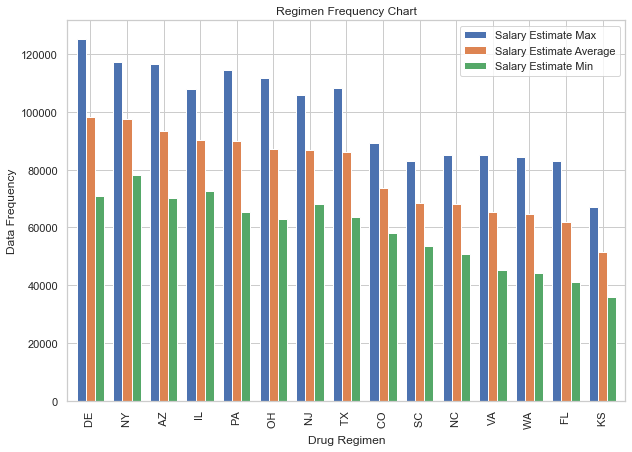

<Figure size 432x288 with 0 Axes>

In [15]:
state_df1.plot(kind="bar", figsize=(10,7), width=.75)

#set chart title
plt.title("Regimen Frequency Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Frequency")

#Show chart and set layout
plt.show()
plt.tight_layout()


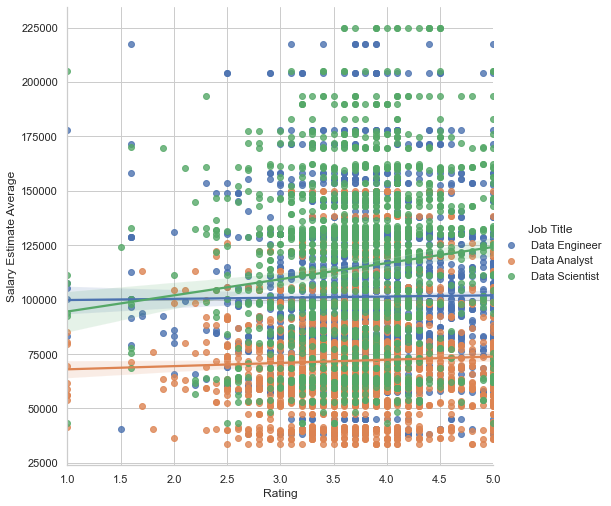

In [16]:
sns.lmplot(data=rating_df, x='Rating', y='Salary Estimate Average', hue='Job Title', height=7)


In [17]:
data_1 = data.groupby(["Size"])
size_df =data_1.mean()


size_df = size_df.drop(size_df.index[[0]])
size_df


,Rating,Salary Estimate Average,Salary Estimate Min,Salary Estimate Max,Founded,Revenue
Size,,,,,,
"Enterprise(5,000+ Employees)",3.704052,98406.266883,74723.392761,122089.141005,1882.648298,2.088304e+09
"Mid-Market(501-5,000 Employees)",3.686724,92940.517241,71360.344828,114520.689655,1783.153448,2.739397e+08
SMB(51-500 Employees),3.793476,94500.487329,71880.233690,117050.682261,1503.011685,6.281402e+07
Unknown,2.144156,89733.766234,68077.922078,111389.610390,154.000000,1.298701e+05
VSB (<50 Employees),3.492057,94002.494244,71727.551804,116277.436685,1407.098235,4.681389e+08
